# ANALYZE STRUCTURE OF OSCILLATORS

# Preliminaries

In [1]:
from analysis.summary_statistics import SummaryStatistics
from analysis.cluster_analyzer import ClusterAnalyzer
from analysis.result_accessor import ResultAccessor
import sirn.constants as cnn
import analysis.constants as cn

import os 

import copy
import numpy as np
from sbmlnetwork import SBMLNetwork
import pandas as pd
import tellurium as te
from typing import List
import matplotlib.pyplot as plt

# Helpers

In [2]:
def drawModel(model):
    rr = te.loada(model) 
    diagram = SBMLNetwork(rr.getSBML())
    diagram.autolayout()
    diagram.draw()

# Try SBMLNetwork

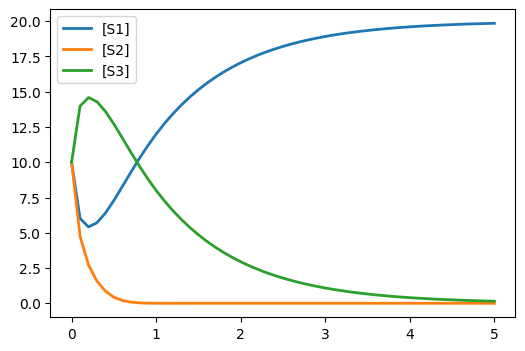

In [3]:
model = """
S1 + S2 -> S3; k1*S1*S2
S3 -> S1; k2*S3
S1 = 10
S2 = 10
S3 =10
k1 = 1
k2 = 1
"""
rr = te.loada(model)
rr.simulate()
rr.plot()

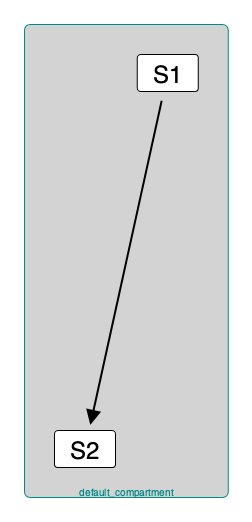

In [4]:


# Tests
model = """
S1 -> S2; S1
S1 = 0; S2 = 0
"""
drawModel(model)

In [5]:
model2 = model.replace("S", "B")
model2 = model2.replace("k", "kB")
model2 = model2.replace("B1", "BB")
model2 = model2.replace("B2", "B1")
model2 = model2.replace("BB", "B2")

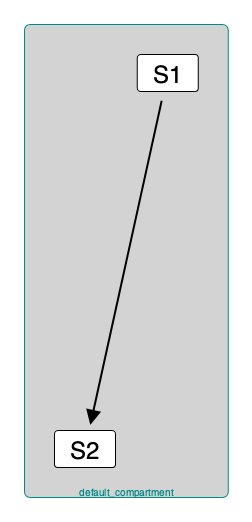

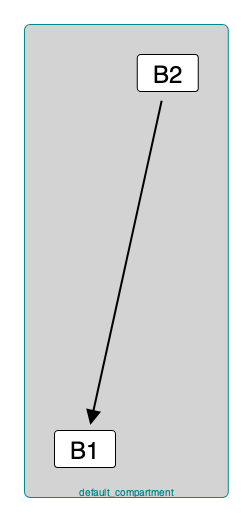

In [6]:
drawModel(model)
drawModel(model2)

# Basic Statistics

## Determined Structural Identity

In [7]:
# Effect of max_log_perm on June_10_B_10507

# Analyze Structurally Identical Files

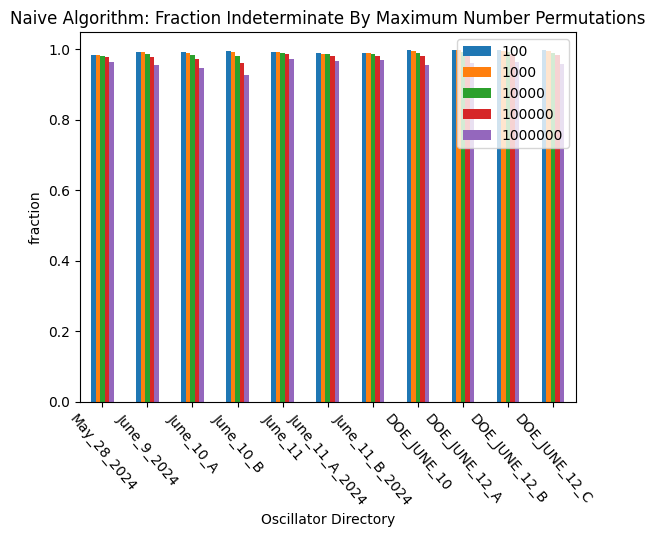

In [22]:
_ = SummaryStatistics.plotMetricByConditions("is_indeterminate_mean",
                identity_types = [True],
                max_num_perms = [100, 1000, 10000, 100000, 1000000],
                sirn_types = [False],
                is_log=False,
                legends=["100", "1000", "10000", "100000", "1000000"],
                title="Naive Algorithm: Fraction Indeterminate By Maximum Number Permutations",
                ylabel="fraction"
                )

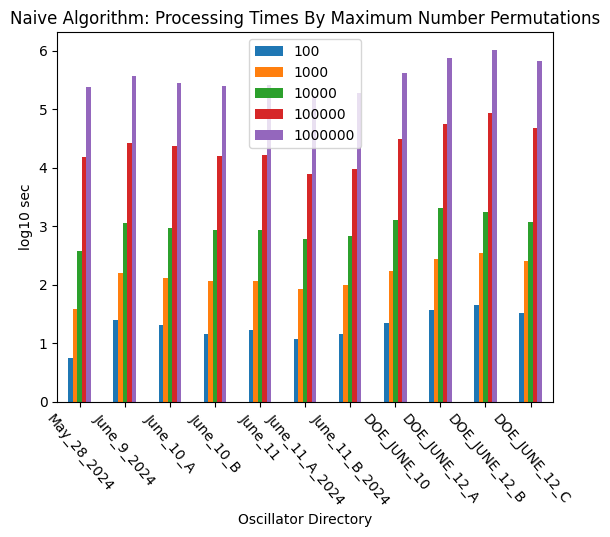

In [23]:
_ = SummaryStatistics.plotMetricByConditions("processing_time_total",
                identity_types = [True],
                max_num_perms = [100, 1000, 10000, 100000, 1000000],
                sirn_types = [False],
                is_log=True,
                legends=["100", "1000", "10000", "100000", "1000000"],
                title="Naive Algorithm: Processing Times By Maximum Number Permutations",
                ylabel="log10 sec"
                )

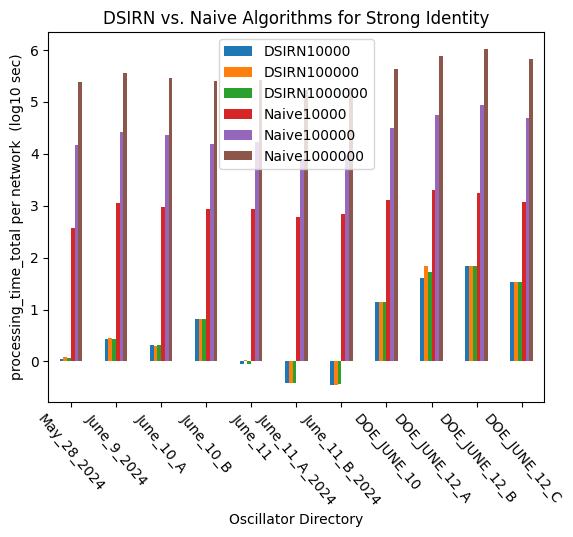

In [10]:
_ = SummaryStatistics.plotMetricByConditions("processing_time_total",
                identity_types = [True],
                max_num_perms = [10000, 100000, 1000000],
                sirn_types = [True, False],
                is_log=True,
                legends=["DSIRN10000", "DSIRN100000", "DSIRN1000000", "Naive10000", "Naive100000", "Naive1000000"],
                title="DSIRN vs. Naive Algorithms for Strong Identity"
                )

In [25]:
1e6/(3600*24)

11.574074074074074

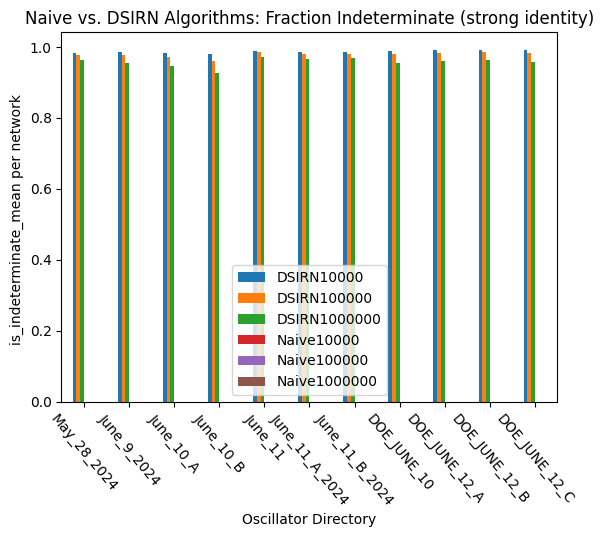

In [24]:
_ = SummaryStatistics.plotMetricByConditions("is_indeterminate_mean",
                identity_types = [True],
                max_num_perms = [10000, 100000, 1000000],
                sirn_types = [False, True],
                is_log=False,
                legends=["DSIRN10000", "DSIRN100000", "DSIRN1000000", "Naive10000", "Naive100000", "Naive1000000"],
                title="Naive vs. DSIRN Algorithms: Fraction Indeterminate (strong identity)"
                )

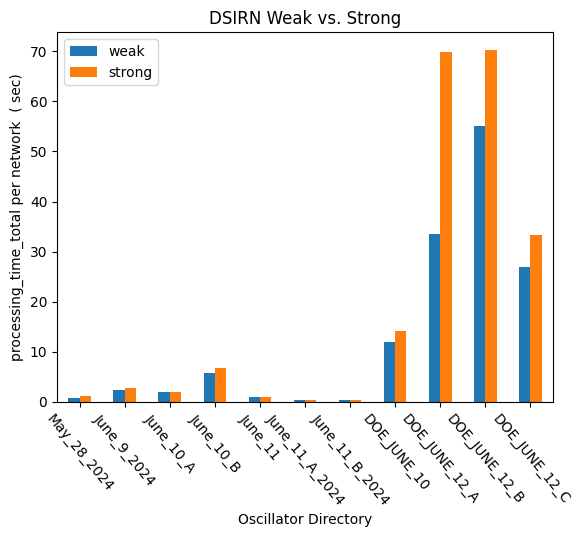

In [12]:
 _ = SummaryStatistics.plotMetricByConditions("processing_time_total",
                identity_types = [False, True],
                max_num_perms = [100000],
                sirn_types = [True],
                is_log=False,
                legends=["weak", "strong"],
                title="DSIRN Weak vs. Strong"
                )

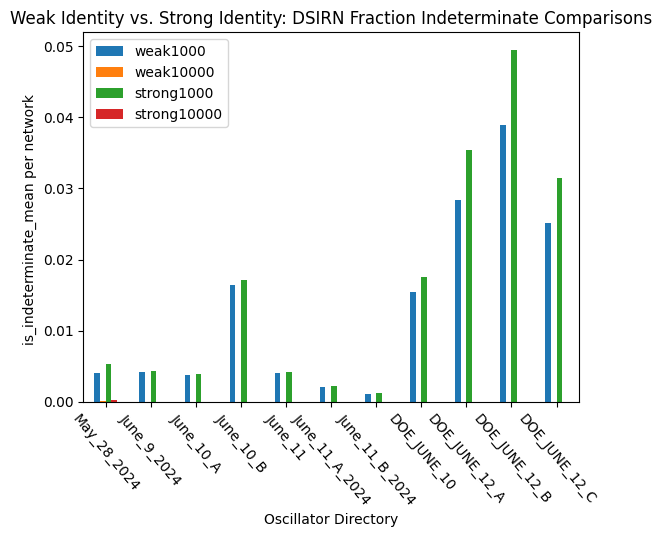

In [13]:
 _ = SummaryStatistics.plotMetricByConditions("is_indeterminate_mean",
                identity_types = [False, True],
                max_num_perms = [1000, 10000],
                sirn_types = [True],
                is_log=False,
                legends=["weak1000", "weak10000", "strong1000", "strong10000"],
                title="Weak Identity vs. Strong Identity: DSIRN Fraction Indeterminate Comparisons"
                )

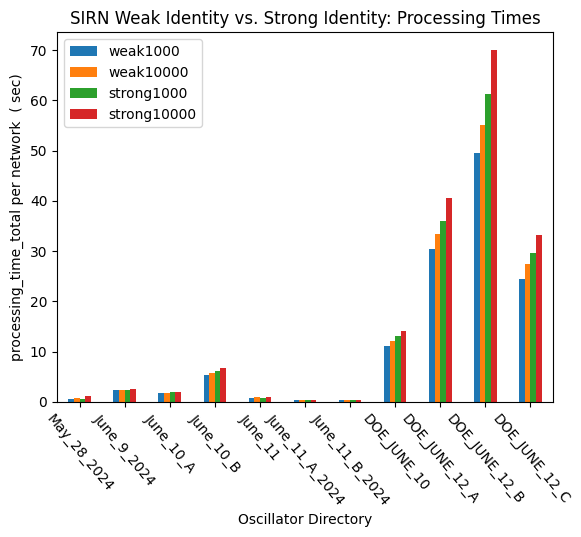

In [14]:
_ = SummaryStatistics.plotMetricByConditions("processing_time_total",
                identity_types = [False, True],
                max_num_perms = [1000, 10000],
                sirn_types = [True],
                is_log=False,
                legends=["weak1000", "weak10000", "strong1000", "strong10000"],
                title="SIRN Weak Identity vs. Strong Identity: Processing Times"
                )

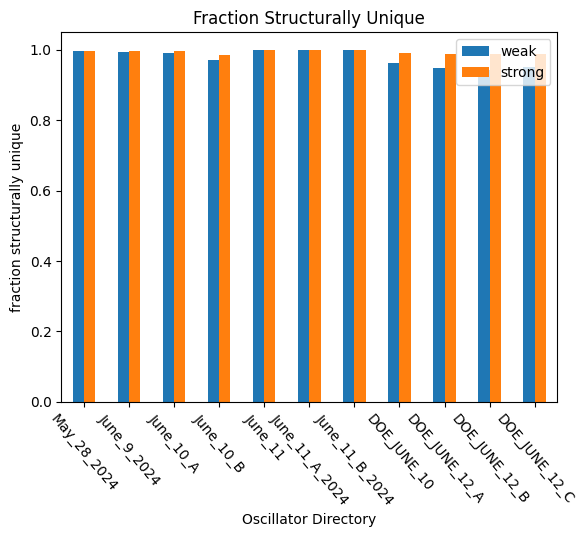

In [15]:
_ = SummaryStatistics.plotMetricByConditions("cluster_size_eq1_mean",
                identity_types = [False, True],
                max_num_perms = [10000],
                sirn_types = [True],
                is_log=False,
                legends=["weak", "strong"],
                title="Fraction Structurally Unique",
                ylabel="fraction structurally unique",
                )

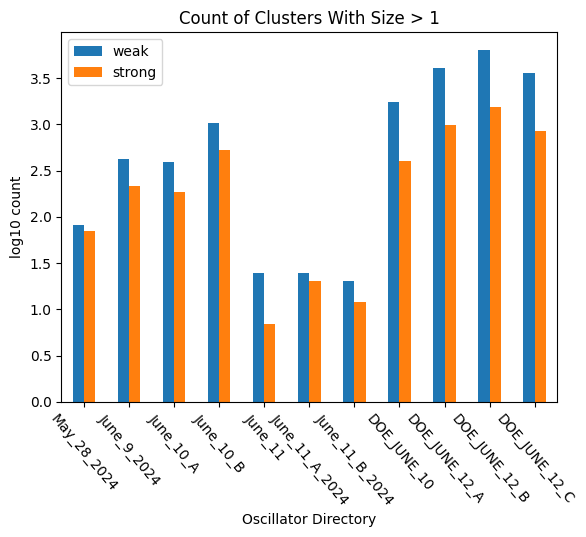

In [16]:
_ = SummaryStatistics.plotMetricByConditions("cluster_size_gt1_total",
                identity_types = [False, True],
                max_num_perms = [100000],
                sirn_types = [True],
                is_log=True,
                legends=["weak", "strong"],
                title="Count of Clusters With Size > 1",
                ylabel="log10 count",
                )

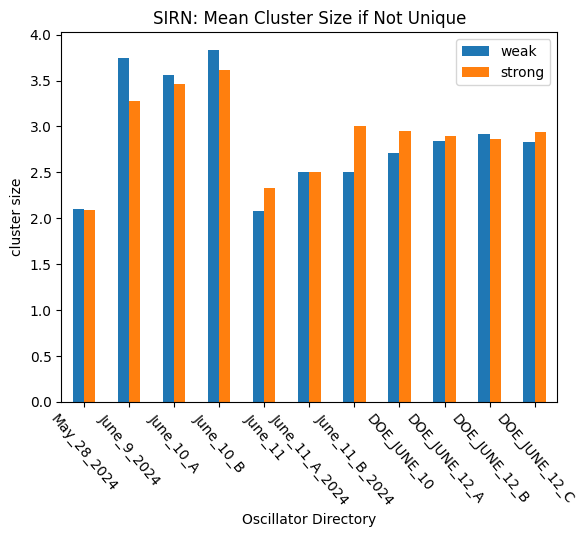

In [17]:
_ = SummaryStatistics.plotMetricByConditions("cluster_size_gt1_mean",
                identity_types = [False, True],
                max_num_perms = [10000],
                sirn_types = [True],
                is_log=False,
                legends=["weak", "strong"],
                title="SIRN: Mean Cluster Size if Not Unique",
                ylabel="cluster size",
                )

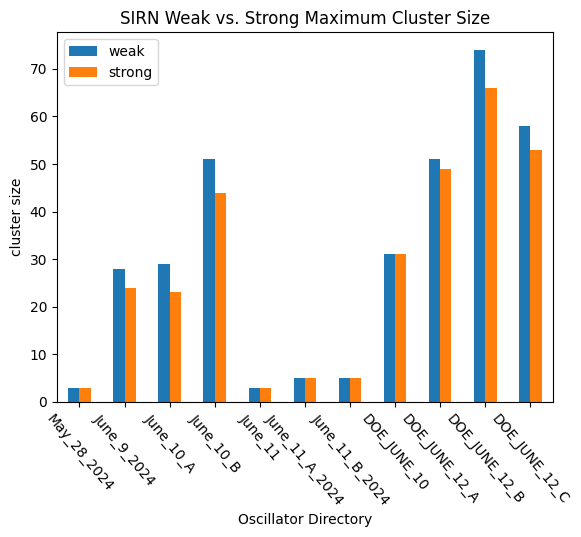

In [18]:
_ = SummaryStatistics.plotMetricByConditions("cluster_size_gt1_max",
                identity_types = [False, True],
                max_num_perms = [10000],
                sirn_types = [True],
                is_log=False,
                legends=["weak", "strong"],
                title="SIRN Weak vs. Strong Maximum Cluster Size",
                ylabel="cluster size",
                )

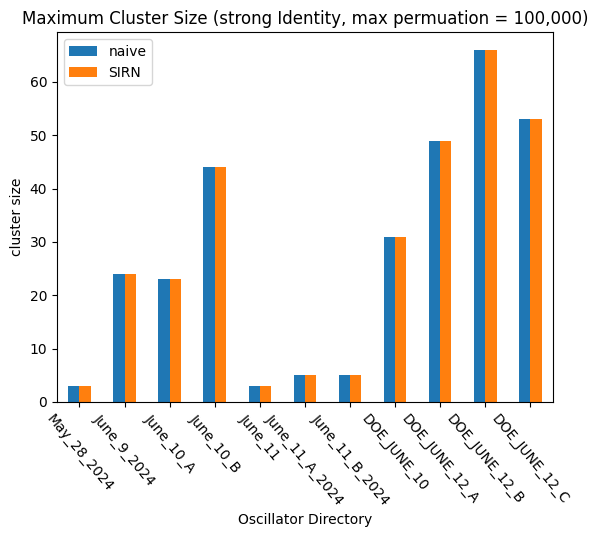

In [19]:
_ = SummaryStatistics.plotMetricByConditions("cluster_size_gt1_max",
                identity_types = [True],
                max_num_perms = [100000],
                sirn_types = [False, True],
                is_log=False,
                legends=["naive", "SIRN"],
                title="Maximum Cluster Size (strong Identity, max permuation = 100,000)",
                ylabel="cluster size",
                )

# Strongly Identical Models



***bestmodel_aT6aFRPp9FgS
S1 + S2 -> S1 + S1; k1*S1*S2
S2 -> S2 + S2; k2*S2
S0 + S1 -> S0; k3*S0*S1
k1 = 9.638691632758352
k2 = 140.93467229481755
k3 = 130.12863364723333
S0 = 1.0
S1 = 5.0
S2 = 9.0

#fitness: 0.059504935359842165


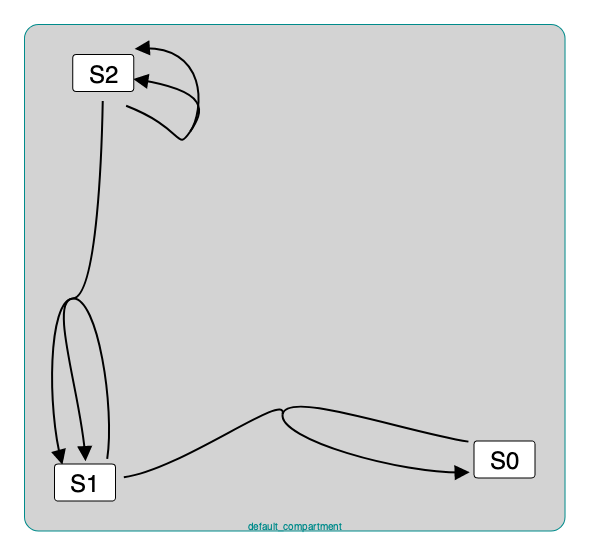

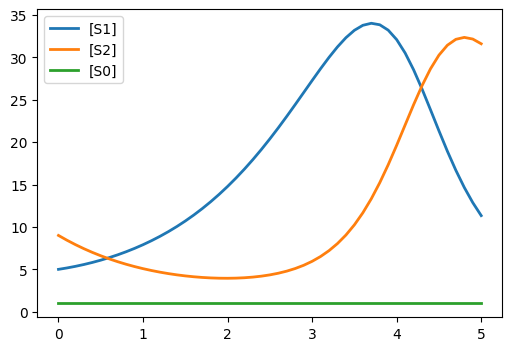



***bestmodel_kKUMTu2eufve
S1 -> S1 + S1; k1*S1
S0 + S2 -> S0; k2*S0*S2
S1 + S2 -> S2 + S2; k3*S1*S2
k1 = 21.50349831683608
k2 = 39.25135702368183
k3 = 2.585238656449374
S0 = 1.0
S1 = 5.0
S2 = 9.0

#fitness: 0.05401054399368935


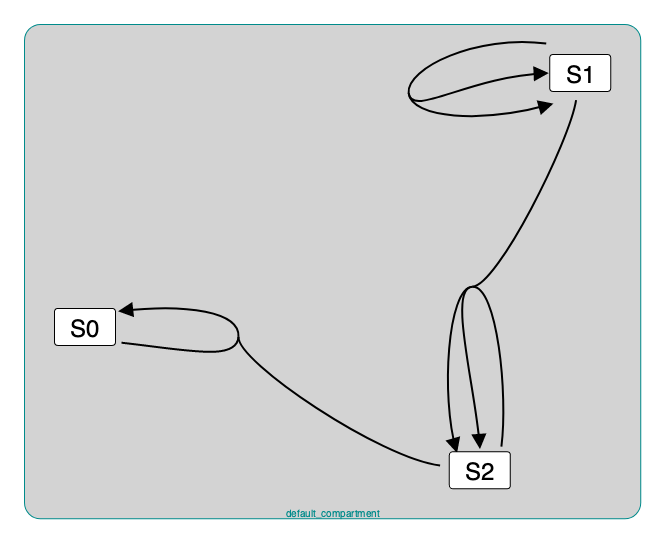

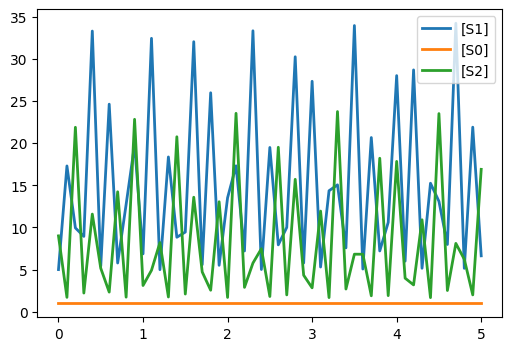



***bestmodel_GCc5iAgD8dmC
S1 + S2 -> S1 + S1; k1*S1*S2
S2 -> S2 + S2; k2*S2
S0 + S1 -> S0; k3*S0*S1
k1 = 6.3753157841851404
k2 = 82.34683075054623
k3 = 77.50724918227421
S0 = 1.0
S1 = 5.0
S2 = 9.0

#fitness: 0.05426206747600841


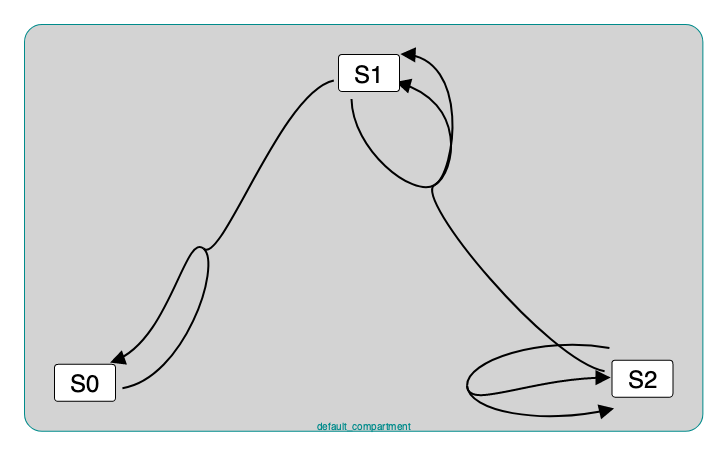

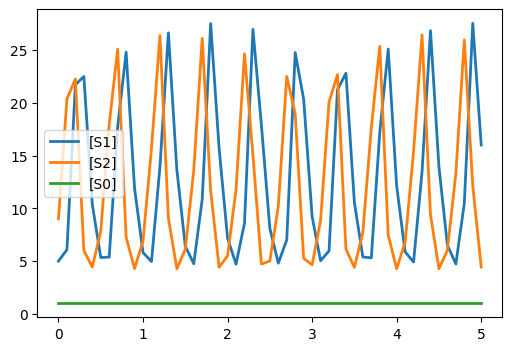



***bestmodel_dTOvFj0RYl4R
S1 + S2 -> S1 + S1; k1*S1*S2
S2 -> S2 + S2; k2*S2
S0 + S1 -> S0; k3*S0*S1
k1 = 4.38715976292011
k2 = 113.08068942685564
k3 = 14.706058105149715
S0 = 1.0
S1 = 5.0
S2 = 9.0

#fitness: 0.05371044235517759


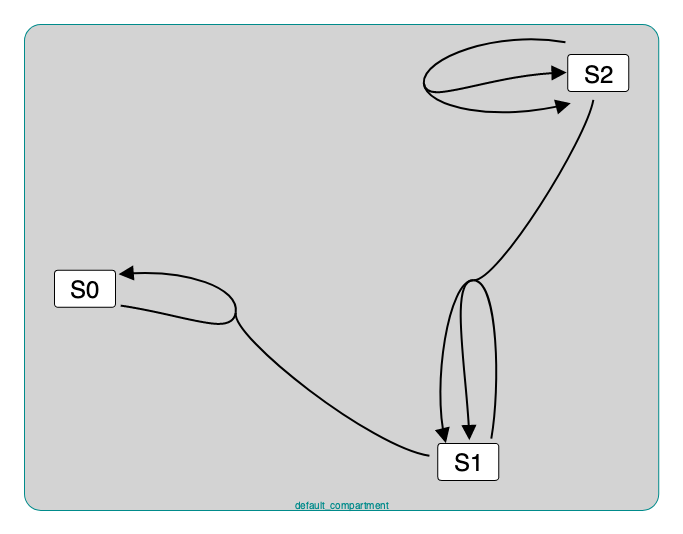

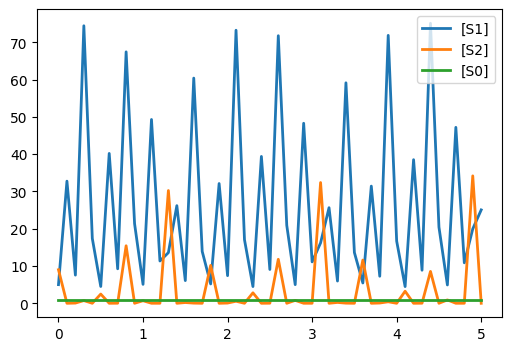



***bestmodel_Dh6kSuUR1MqX
S1 + S2 -> S1 + S1; k1*S1*S2
S2 -> S2 + S2; k2*S2
S0 + S1 -> S0; k3*S0*S1
k1 = 8.544073460559117
k2 = 169.64065022642697
k3 = 12.28689400442673
S0 = 1.0
S1 = 5.0
S2 = 9.0

#fitness: 0.02803746202365008


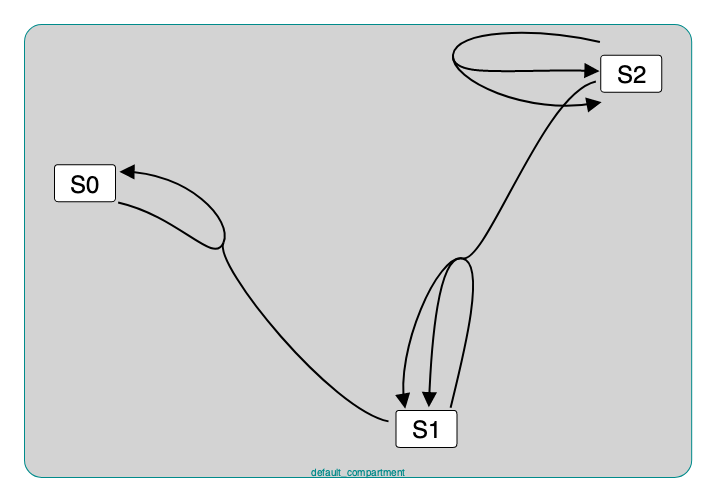

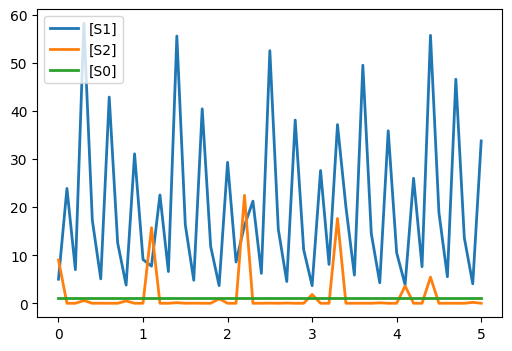



***bestmodel_AY7q5AUZem1a
S1 + S2 -> S1 + S1; k1*S1*S2
S2 -> S2 + S2; k2*S2
S0 + S1 -> S0; k3*S0*S1
k1 = 3.8002199429387398
k2 = 93.05744317194178
k3 = 14.928816106556194
S0 = 1.0
S1 = 5.0
S2 = 9.0

#fitness: 0.05124896676833003


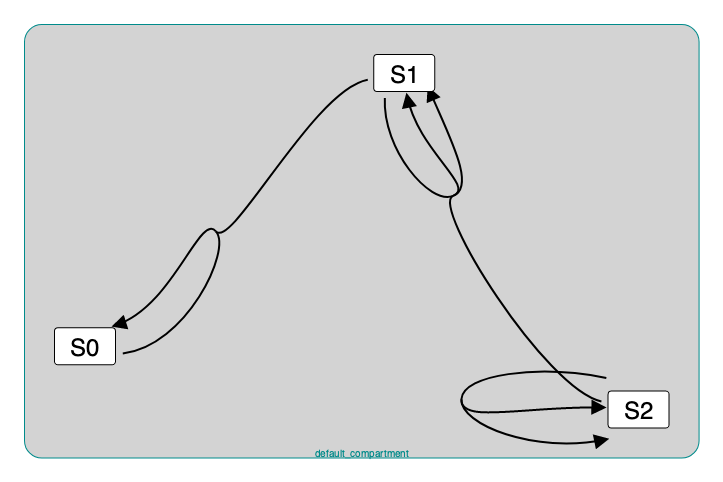

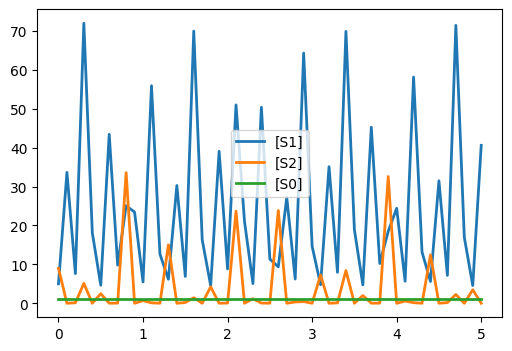



***bestmodel_eIHNnJwvMloE
S0 + S1 -> S1; k1*S0*S1
S2 -> S2 + S2; k2*S2
S0 + S2 -> S0 + S0; k3*S0*S2
k1 = 8.819679092456196
k2 = 16.744802419346975
k3 = 3.074160788595944
S0 = 1.0
S1 = 5.0
S2 = 9.0

#fitness: 0.04717386726820785


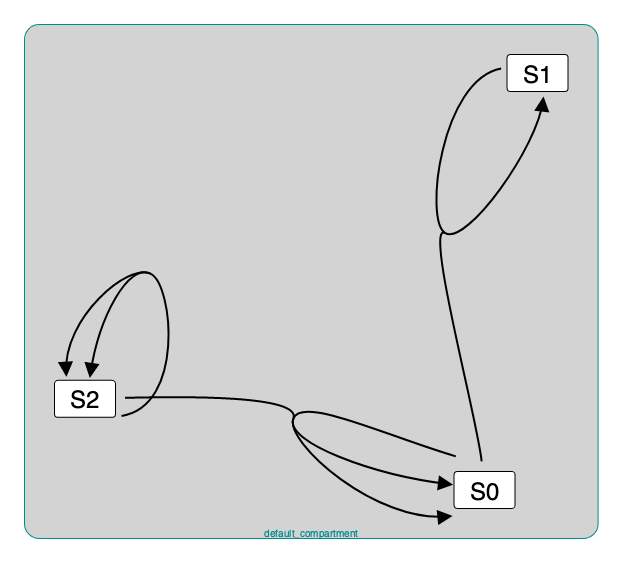

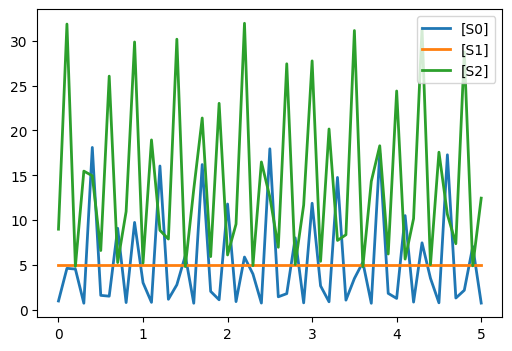



***bestmodel_evkG2szHi1HV
S0 + S1 -> S1; k1*S0*S1
S2 -> S2 + S2; k2*S2
S0 + S2 -> S0 + S0; k3*S0*S2
k1 = 108.7966643334983
k2 = 50.39207531557445
k3 = 24.58783835213345
S0 = 1.0
S1 = 5.0
S2 = 9.0

#fitness: 0.033517606649087484


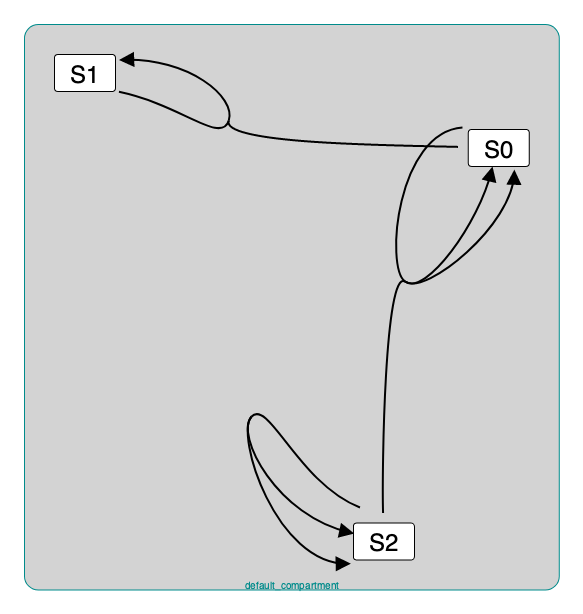

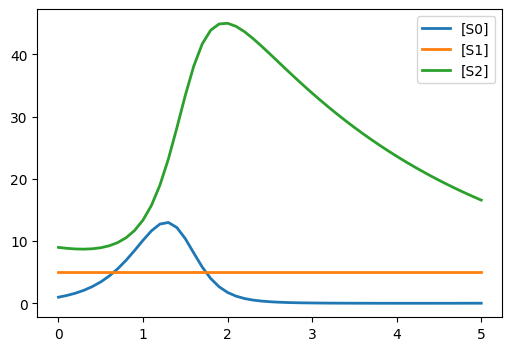



***bestmodel_ALuztNj7QiL9
S1 + S2 -> S1 + S1; k1*S1*S2
S2 -> S2 + S2; k2*S2
S0 + S1 -> S0; k3*S0*S1
k1 = 2.2515323195556167
k2 = 40.19977530926171
k3 = 20.184278488843585
S0 = 1.0
S1 = 5.0
S2 = 9.0

#fitness: 0.18775269551690052


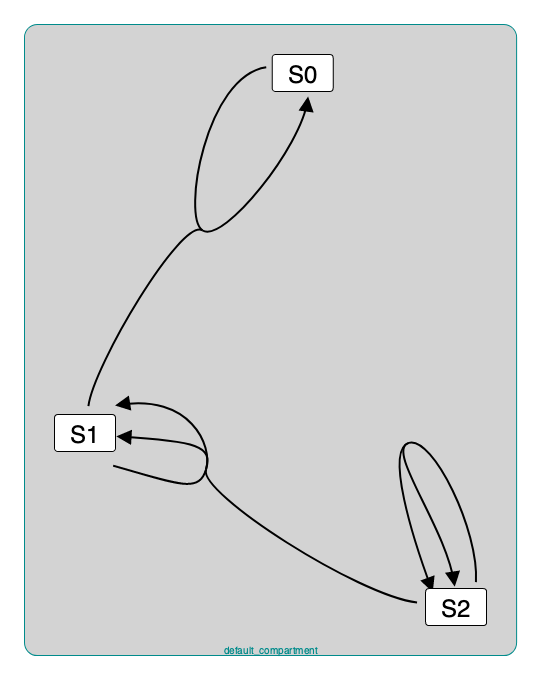

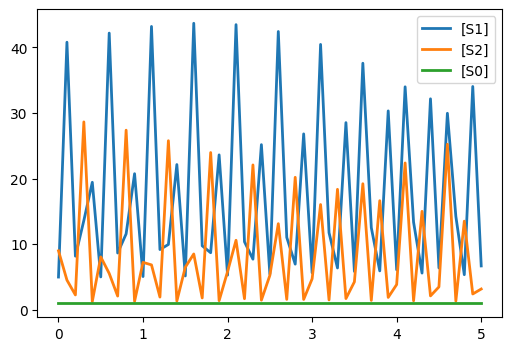



***bestmodel_f6YXYS7HxRWJ
S1 + S2 -> S1 + S1; k1*S1*S2
S2 -> S2 + S2; k2*S2
S0 + S1 -> S0; k3*S0*S1
k1 = 2.0551827607520297
k2 = 36.65385355919149
k3 = 21.863683137417013
S0 = 1.0
S1 = 5.0
S2 = 9.0

#fitness: 0.1039487069045264


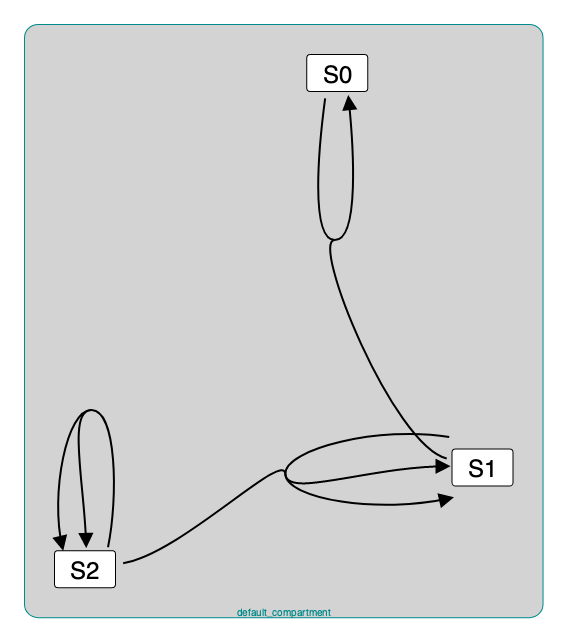

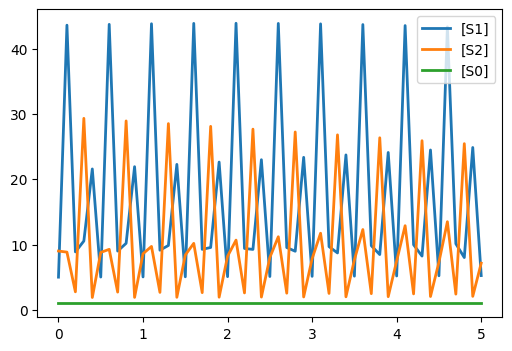

In [20]:
path = ResultAccessor.getClusterResultPath(oscillator_dir="Oscillators_DOE_JUNE_12_B_41373")
statistics = SummaryStatistics(path)
accessor = statistics.result_accessor
#
key = [k for k, v in statistics.cluster_dct.items() if len(v) == 66][0]
models = [statistics.result_accessor.df.loc[n, cn.COL_MODEL_NAME] for n in statistics.cluster_dct[key]]
for idx in range(10):
    model_name = models[idx]
    print("\n\n***" + model_name)
    antimony_str = accessor.getAntimonyFromModelname(model_name)
    print(antimony_str)
    drawModel(antimony_str)
    rr = te.loada(antimony_str)
    rr.simulate()
    rr.plot()
    

# Example of Complicated Structural Identity

In [21]:
from analysis.summary_statistics import SummaryStatistics
from analysis.cluster_analyzer import ClusterAnalyzer
from analysis.result_accessor import ResultAccessor
import sirn.constants as cnn
import analysis.constants as cn

import os 

import copy
import numpy as np
from sbmlnetwork import SBMLNetwork
import pandas as pd
import tellurium as te
from typing import List
import matplotlib.pyplot as plt

def drawModel(model):
    rr = te.loada(model) 
    diagram = SBMLNetwork(rr.getSBML())
    diagram.autolayout()
    diagram.draw()

path = ResultAccessor.getClusterResultPath(oscillator_dir=cnn.OSCILLATOR_DIRS[7])
path = ResultAccessor.getClusterResultPath(oscillator_dir=cnn.OSCILLATOR_DIRS[4])
statistics = SummaryStatistics(path)
accessor = statistics.result_accessor
#
keys = [k for k, v in statistics.cluster_dct.items() if len(v) >= 2]
models = []

for key in keys:
    idxs = statistics.cluster_dct[key]
    for model in models:
        antimony_str = accessor.getAntimonyFromModelname(model)
        if "S6" in antimony_str:
            print(antimony_str)

# Vectorizing

In [127]:
arr1 = np.random.randint(0, 5, (3, 5))
arr1

array([[1, 3, 0, 1, 3],
       [0, 3, 1, 3, 2],
       [1, 3, 0, 0, 1]])

In [88]:
arr2 = np.repeat(3, 30)
arr2 = np.reshape(arr2, (6, 5))
arr2[4,:] = np.repeat(2, 5)
arr2

array([[3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3]])

In [73]:
arr1[0, :] <= arr2[0, :]

array([ True, False, False,  True,  True])

In [89]:
mat1 = np.repeat(arr1[0, :], 6)
mat1 = np.reshape(mat1, (5, 6))
mat1 = np.transpose(mat1)
mat1

array([[0, 1, 3, 0, 1],
       [0, 1, 3, 0, 1],
       [0, 1, 3, 0, 1],
       [0, 1, 3, 0, 1],
       [0, 1, 3, 0, 1],
       [0, 1, 3, 0, 1]])

In [90]:
np.all(mat1 <= arr2, axis=1)

array([ True,  True,  True,  True, False,  True])

In [128]:
# Generalize to all rows of arr1
num_row_other = 6
num_row_self, num_col = np.shape(arr1)
#
mat1 = np.repeat(arr1, num_row_other, axis=0)
#mat1 = np.reshape(mat1, (num_col, num_row_self*num_row_other))
mat1

array([[1, 3, 0, 1, 3],
       [1, 3, 0, 1, 3],
       [1, 3, 0, 1, 3],
       [1, 3, 0, 1, 3],
       [1, 3, 0, 1, 3],
       [1, 3, 0, 1, 3],
       [0, 3, 1, 3, 2],
       [0, 3, 1, 3, 2],
       [0, 3, 1, 3, 2],
       [0, 3, 1, 3, 2],
       [0, 3, 1, 3, 2],
       [0, 3, 1, 3, 2],
       [1, 3, 0, 0, 1],
       [1, 3, 0, 0, 1],
       [1, 3, 0, 0, 1],
       [1, 3, 0, 0, 1],
       [1, 3, 0, 0, 1],
       [1, 3, 0, 0, 1]])

In [129]:
mat2 = np.repeat(arr2, num_row_self, axis=0)
mat2

array([[3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3],
       [2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3]])

In [135]:
# Rows: rows of other. Columns: rows of self that are all true.
result = np.reshape(np.all(mat1 <= mat2, axis=1), (num_row_other, num_row_self))
result

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [False, False, False],
       [ True,  True,  True]])

In [138]:
index_arr = np.array(range(6))
index_arr[np.all(result, axis=1)]

array([0, 1, 2, 3, 5])

In [166]:
def findCompatibleRows(subset_mat:np.array, superset_mat:np.array)->list:
    """
    Finds for each row in subset, the collection of rows in subset such the row in subset <= row in superset.

    Args:
        subset_mat: np.ndarray (subset_num_row, num_col)
        superset_mat: np.ndarray (superset_num_row, num_col)

    Returns:
        List[np.ndarry]: list of the rows in subset <= row in superset
    """
    num_row_subset, num_col = np.shape(subset_mat)
    num_row_superset, _ = np.shape(superset_mat)
    # Expand the matrices
    mat1 = np.repeat(subset_mat, num_row_superset, axis=0)
    mat2 = np.concatenate([superset_mat for _ in range(num_row_subset)])
    import pdb; pdb.set_trace()
    # Do the comparisons. Rows are the rows in superset; columns are rows in subset.
    # We want the indices of rows in superset for each column (row in subset)
    comparison_arr = np.reshape(np.all(mat1 <= mat2, axis=1), (num_row_superset, num_row_subset))
    index_arr = np.array(range(num_row_superset))  # All superset rows
    # For each row n in subset (column in comparison_arr), select those rows in superset
    # that satisfy the inequality.
    compatibles = [index_arr[comparison_arr[:, n]] for n in range(num_row_subset)]
    return compatibles

# TESTS
findCompatibleRows(arr1, arr2)

> /var/folders/02/lb248q1j50dch2pthzkvxmpr0000gn/T/ipykernel_79183/709624473.py(20)findCompatibleRows()
     18     # Do the comparisons. Rows are the rows in superset; columns are rows in subset.
     19     # We want the indices of rows in superset for each column (row in subset)
---> 20     comparison_arr = np.reshape(np.all(mat1 <= mat2, axis=1), (num_row_superset, num_row_subset))
     21     index_arr = np.array(range(num_row_superset))  # All superset rows
     22     # For each row n in subset (column in comparison_arr), select those rows in superset



ipdb>  c


[array([0, 1, 2, 3, 4, 5]), array([0, 2, 4]), array([0, 1, 2, 3, 4, 5])]

In [167]:
# Random tests
subset_size = 2
superset_size = 10
#subset_mat = np.array(np.random.randint(0, 3, (subset_size, 5)))
#superset_mat = np.array(np.random.randint(0, 6, (superset_size, 5)))
findCompatibleRows(subset_mat, superset_mat)

> /var/folders/02/lb248q1j50dch2pthzkvxmpr0000gn/T/ipykernel_79183/709624473.py(20)findCompatibleRows()
     18     # Do the comparisons. Rows are the rows in superset; columns are rows in subset.
     19     # We want the indices of rows in superset for each column (row in subset)
---> 20     comparison_arr = np.reshape(np.all(mat1 <= mat2, axis=1), (num_row_superset, num_row_subset))
     21     index_arr = np.array(range(num_row_superset))  # All superset rows
     22     # For each row n in subset (column in comparison_arr), select those rows in superset



ipdb>  mat2


array([[0, 4, 3, 2, 3],
       [2, 2, 4, 1, 2],
       [1, 1, 3, 2, 1],
       [2, 5, 4, 4, 3],
       [5, 2, 5, 4, 2],
       [2, 4, 5, 5, 4],
       [1, 2, 0, 0, 5],
       [2, 0, 3, 2, 1],
       [0, 1, 0, 4, 3],
       [1, 5, 1, 5, 5],
       [0, 4, 3, 2, 3],
       [2, 2, 4, 1, 2],
       [1, 1, 3, 2, 1],
       [2, 5, 4, 4, 3],
       [5, 2, 5, 4, 2],
       [2, 4, 5, 5, 4],
       [1, 2, 0, 0, 5],
       [2, 0, 3, 2, 1],
       [0, 1, 0, 4, 3],
       [1, 5, 1, 5, 5]])


ipdb>  c


[array([0, 1, 2, 7]), array([0, 1, 2, 6, 7, 9])]

In [156]:
subset_mat

array([[2, 1, 2, 0, 1],
       [2, 1, 1, 2, 2]])

In [163]:
superset_mat

array([[0, 4, 3, 2, 3],
       [2, 2, 4, 1, 2],
       [1, 1, 3, 2, 1],
       [2, 5, 4, 4, 3],
       [5, 2, 5, 4, 2],
       [2, 4, 5, 5, 4],
       [1, 2, 0, 0, 5],
       [2, 0, 3, 2, 1],
       [0, 1, 0, 4, 3],
       [1, 5, 1, 5, 5]])

In [165]:
np.concatenate([superset_mat for _ in range(2)])

array([[0, 4, 3, 2, 3],
       [2, 2, 4, 1, 2],
       [1, 1, 3, 2, 1],
       [2, 5, 4, 4, 3],
       [5, 2, 5, 4, 2],
       [2, 4, 5, 5, 4],
       [1, 2, 0, 0, 5],
       [2, 0, 3, 2, 1],
       [0, 1, 0, 4, 3],
       [1, 5, 1, 5, 5],
       [0, 4, 3, 2, 3],
       [2, 2, 4, 1, 2],
       [1, 1, 3, 2, 1],
       [2, 5, 4, 4, 3],
       [5, 2, 5, 4, 2],
       [2, 4, 5, 5, 4],
       [1, 2, 0, 0, 5],
       [2, 0, 3, 2, 1],
       [0, 1, 0, 4, 3],
       [1, 5, 1, 5, 5]])